In [1]:
import pandas as pd
import numpy as np
import os
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/6A/subset_outputs/"

MINUTES_PER_FRAME = 25

experiments = {
    "B3" : "PRRX1",
    "B5" : "Control",
    "D5" : "MyoD",
    "C2" : "Twist2"
}

df_list = []

for _dir, condition in experiments.items():
    tracks_path = f"{root_dir}{_dir}/Track statistics.csv"
    tracks = pd.read_csv(tracks_path)
    
    spots_path = f"{root_dir}{_dir}/All Spots statistics.csv"
    spots = pd.read_csv(spots_path)
    
    
    print(condition, spots['TRACK_ID'].nunique())
    
    # convert types
    spots = spots[spots['TRACK_ID'] != "None"]
    spots = spots.astype({"TRACK_ID": int})
    
    tracks = tracks.astype({"TRACK_ID": int})
    
    # merge 
    tmp = pd.merge(spots, tracks, how='left', on=['TRACK_ID'])
    
    # sort by ID then FRAME
    tmp = tmp.sort_values(by=['TRACK_ID', 'FRAME'])

    # add a grouped step 
    tmp.loc[:, 'STEP'] =  tmp.groupby(['TRACK_ID']).cumcount()
    tmp.loc[:, 'NORMED_STEP'] = tmp['STEP'] / tmp['TRACK_DURATION']
    
    tmp['Scene'] = _dir
    tmp['Condition'] = condition
    tmp['Time'] = (tmp['FRAME'] * MINUTES_PER_FRAME) / 60
    
    tmp['TRACK_ID'] = tmp['TRACK_ID'].astype(str) + "_" + str(_dir)
    df_list.append(tmp)
    
    
df = pd.concat(df_list, ignore_index=True)
print(df.columns)
df.head()

PRRX1 1946
Control 1327
MyoD 755
Twist2 1589
Index(['Label_x', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY',
       'CELL_DIVISION_TIME', 'MEAN_INTENSITY01', 'MEAN_INTENSITY02',
       'MEAN_INTENSITY03', 'MEAN_INTENSITY04', 'MEAN_INTENSITY05',
       'MEAN_INTENSITY06', 'MEAN_INTENSITY07', 'MEAN_INTENSITY08',
       'MEAN_INTENSITY09', 'MEAN_INTENSITY10', 'MANUAL_COLOR',
       'MEAN_INTENSITY', 'MEDIAN_INTENSITY', 'MIN_INTENSITY', 'MAX_INTENSITY',
       'TOTAL_INTENSITY', 'STANDARD_DEVIATION', 'ESTIMATED_DIAMETER',
       'CONTRAST', 'SNR', 'Label_y', 'DIVISION_TIME_MEAN', 'DIVISION_TIME_STD',
       'MEAN_TRACK_INTENSITY01', 'MEAN_TRACK_INTENSITY02',
       'MEAN_TRACK_INTENSITY03', 'MEAN_TRACK_INTENSITY04',
       'MEAN_TRACK_INTENSITY05', 'MEAN_TRACK_INTENSITY06',
       'MEAN_TRACK_INTENSITY07', 'MEAN_TRACK_INTENSITY08',
       'MEAN_TRACK_INTENSITY09', 'MEAN_TRACK_INTENSITY10', 'NUMBER_SPOTS',
      

,Label_x,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,TOTAL_ABSOLUTE_ANGLE_XY,TOTAL_ABSOLUTE_ANGLE_YZ,TOTAL_ABSOLUTE_ANGLE_ZX,STEP,NORMED_STEP,Scene,Condition,Time
0,ID1727,1727,0_B3,1.724,1009.348,168.416,0,0.000,0,9.0,...,0.677,NaN,-1.439,3.142,1.571,0,0.000000,B3,PRRX1,0.000000
1,ID2901,2901,0_B3,1.838,998.056,172.552,0,1500.003,1,9.0,...,0.677,NaN,-1.439,3.142,1.571,1,0.000067,B3,PRRX1,0.416667
2,ID3475,3475,0_B3,1.793,997.516,167.382,0,3000.006,2,9.0,...,0.677,NaN,-1.439,3.142,1.571,2,0.000133,B3,PRRX1,0.833333
3,ID4070,4070,0_B3,1.610,995.881,162.053,0,4500.009,3,9.0,...,0.677,NaN,-1.439,3.142,1.571,3,0.000200,B3,PRRX1,1.250000
4,ID3275,3275,0_B3,1.622,994.076,153.583,0,7500.015,5,9.0,...,0.677,NaN,-1.439,3.142,1.571,4,0.000267,B3,PRRX1,2.083333


In [3]:
# subset the columns to make processing easier
cols = [
    'TRACK_ID', 
    'QUALITY', 
    'SNR',
    'POSITION_X',
    'POSITION_Y',
    'FRAME', 
    'Time',
    'STEP',
    'NORMED_STEP',
    'RADIUS',
    'MEAN_INTENSITY01', 
    'MEAN_INTENSITY02',
    'MEAN_INTENSITY03',
    'MEAN_TRACK_INTENSITY01',
    'MEAN_TRACK_INTENSITY02',
    'MEAN_TRACK_INTENSITY03',
    'TOTAL_DISTANCE_TRAVELED',
    'TRACK_DURATION',
    'Scene',
    'Condition'
]

df = df[cols]

df.head()

,TRACK_ID,QUALITY,SNR,POSITION_X,POSITION_Y,FRAME,Time,STEP,NORMED_STEP,RADIUS,MEAN_INTENSITY01,MEAN_INTENSITY02,MEAN_INTENSITY03,MEAN_TRACK_INTENSITY01,MEAN_TRACK_INTENSITY02,MEAN_TRACK_INTENSITY03,TOTAL_DISTANCE_TRAVELED,TRACK_DURATION,Scene,Condition
0,0_B3,1.724,1.435,1009.348,168.416,0,0.000000,0,0.000000,9.0,0.0,0.0,177.196,1.282,0.0,186.622,82.449,15000.03,B3,PRRX1
1,0_B3,1.838,1.676,998.056,172.552,1,0.416667,1,0.000067,9.0,0.0,0.0,188.738,1.282,0.0,186.622,82.449,15000.03,B3,PRRX1
2,0_B3,1.793,1.666,997.516,167.382,2,0.833333,2,0.000133,9.0,0.0,0.0,188.738,1.282,0.0,186.622,82.449,15000.03,B3,PRRX1
3,0_B3,1.610,1.326,995.881,162.053,3,1.250000,3,0.000200,9.0,0.0,0.0,178.265,1.282,0.0,186.622,82.449,15000.03,B3,PRRX1
4,0_B3,1.622,1.408,994.076,153.583,5,2.083333,4,0.000267,9.0,0.0,0.0,184.891,1.282,0.0,186.622,82.449,15000.03,B3,PRRX1


In [4]:
def normalize_tracks(df, col_list, w=7):
    """A function to normalize tracks """
    
    
    for col in col_list:
        new_colname = f"clean_{col}"
        # smoothing
        df[new_colname] = df.groupby('TRACK_ID')[col].transform(lambda s: s.rolling(w).mean())

        # peak normalization norm
        df[new_colname] = df[new_colname] / df.groupby('TRACK_ID')[new_colname].transform(np.max)
        
    return df
        
        
        
# make easier to read colnames
df['mCherry'] = df['MEAN_INTENSITY01'] 
df['mVenus'] = df['MEAN_INTENSITY02'] 
df['H2B'] = df['MEAN_INTENSITY03'] 


col_list = [
    'mCherry',
    'mVenus',
    'H2B'
]

df = normalize_tracks(df, col_list)
df[col_list].head()


,mCherry,mVenus,H2B
0,0.0,0.0,177.196
1,0.0,0.0,188.738
2,0.0,0.0,188.738
3,0.0,0.0,178.265
4,0.0,0.0,184.891


In [5]:
QUALITY_THRESHOLD = 1.1
MIN_MAX_STEP = 40

# exclude tracks with no positive PF signal
print(df.shape)
print(df['TRACK_ID'].nunique())


# binary flags for track that have any detetable PF signal
df['ANY_mCherry'] = np.where(df['clean_mCherry'] > 0, 1, 0)
df['ANY_mVenus'] = np.where(df['clean_mVenus'] > 0, 1, 0)
df['ANY_H2B'] = np.where(df['clean_H2B'] > 0, 1, 0)

df['has_mCherry'] = df.groupby(['TRACK_ID', 'Condition'])['ANY_mCherry'].transform(np.max)
df['has_mVenus'] = df.groupby(['TRACK_ID', 'Condition'])['ANY_mVenus'].transform(np.max)
df['has_H2B'] = df.groupby(['TRACK_ID', 'Condition'])['ANY_H2B'].transform(np.max)

# filter for positive PF signal
df = df[df['has_mVenus'] == 1]
df = df[df['has_mCherry'] == 1]

# drop short tracks
df['max_step'] = df.groupby(['TRACK_ID'])['STEP'].transform(np.max)

df = df[df['max_step'] > MIN_MAX_STEP]

print(df.shape)
print(df['TRACK_ID'].nunique())

(76318, 26)
5613
(20797, 33)
324


Text(0, 0.5, 'Normalized Intensity')

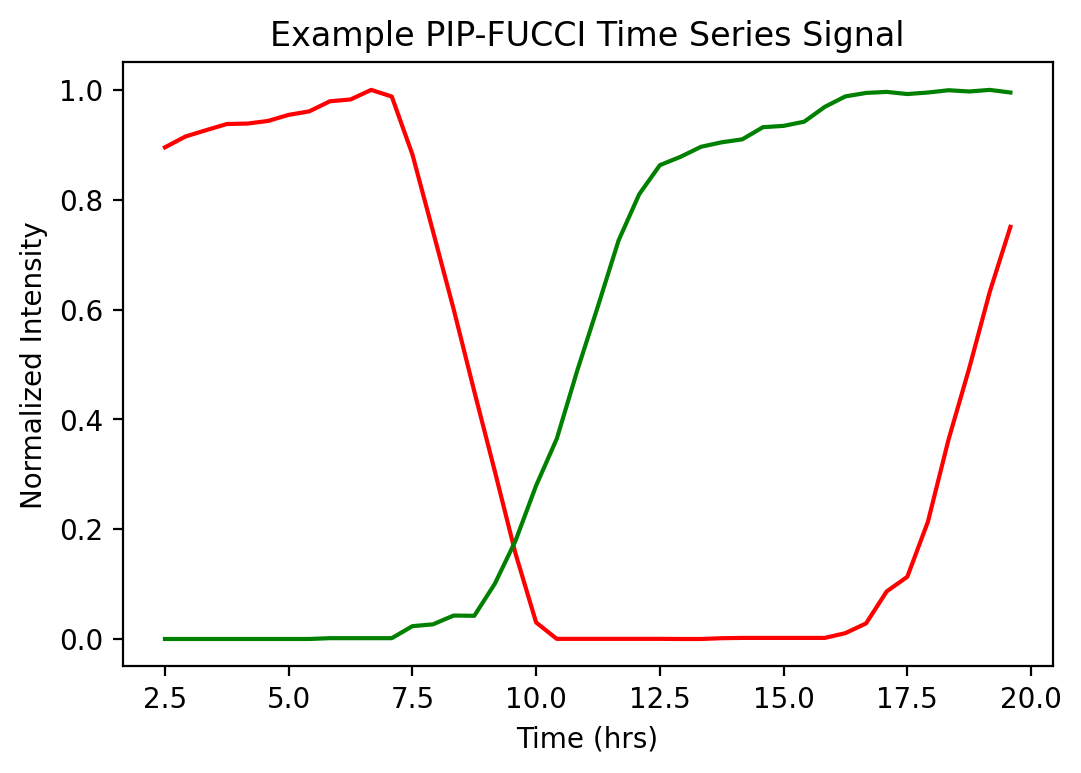

In [6]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 4

rand_tid = np.random.choice(df['TRACK_ID'], 1)[0]

tmp = df[df['TRACK_ID'] == rand_tid]

plt.plot(tmp['Time'], tmp['clean_mCherry'], 'r')
plt.plot(tmp['Time'], tmp['clean_mVenus'], 'g')

plt.title(f"Example PIP-FUCCI Time Series Signal")
plt.xlabel("Time (hrs)")
plt.ylabel("Normalized Intensity")

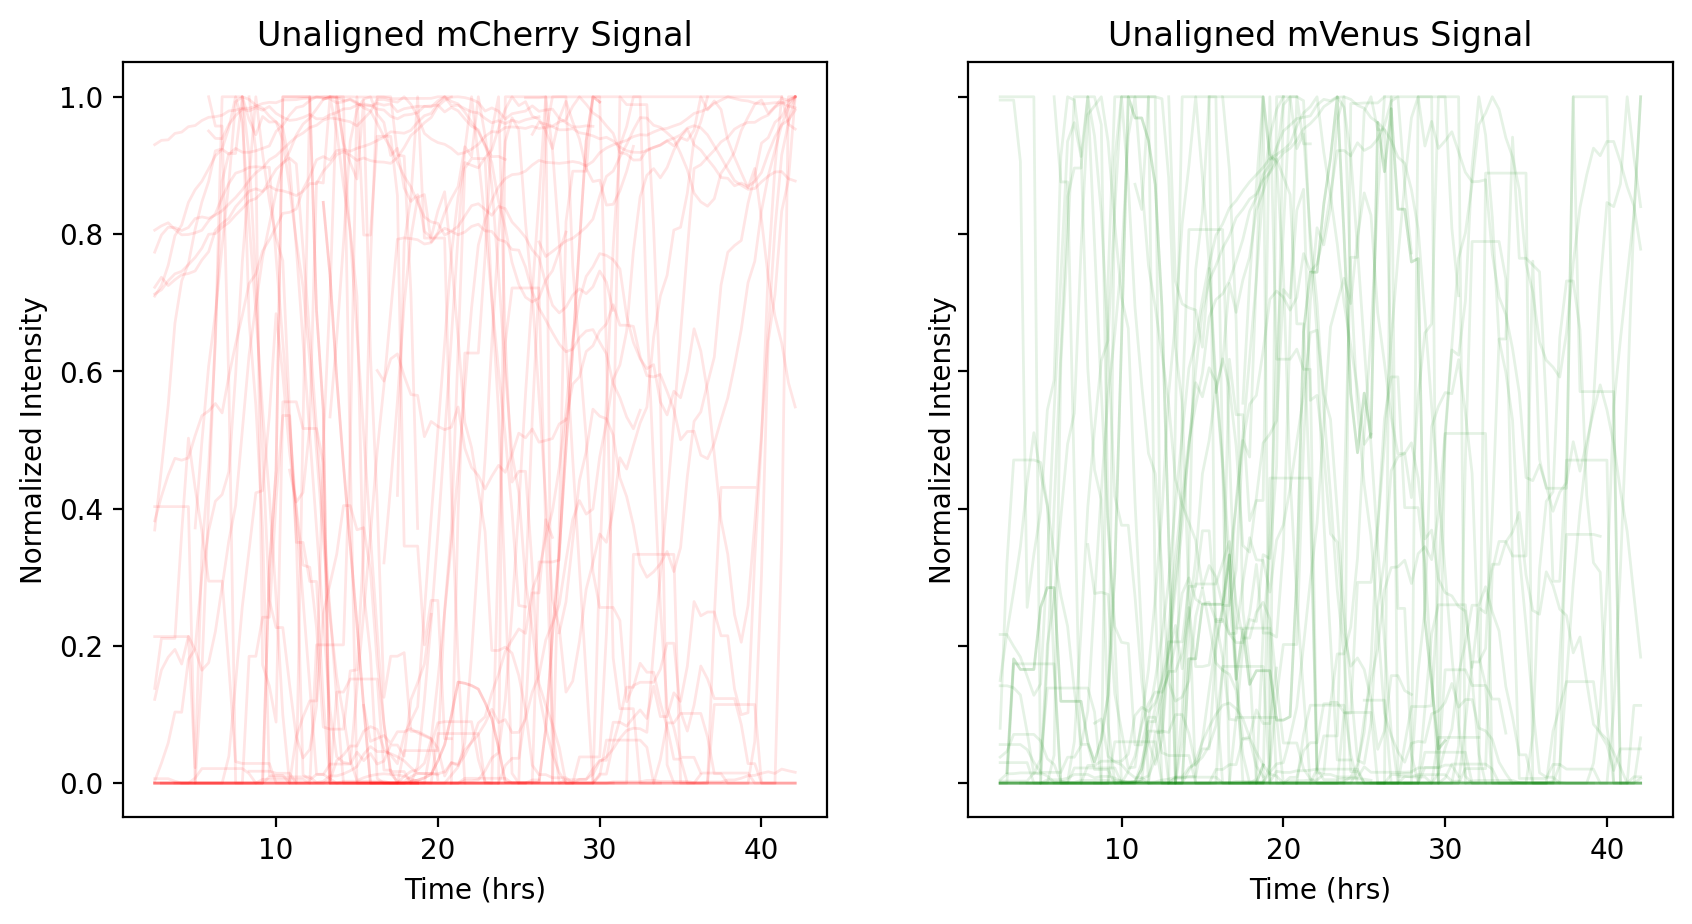

In [33]:
N = 50
alpha = 0.1

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 5
fig, axs = plt.subplots(1, 2, sharey=True)

sample = np.random.choice(df['TRACK_ID'].unique(), N)

for tid in sample:
    tmp = df[df['TRACK_ID'] == tid]
    
    tmp = tmp.sort_values(by='FRAME')

    axs[0].plot(tmp['Time'], tmp['clean_mCherry'], lw=1, alpha=alpha, c='r')
    axs[0].set_title('Unaligned mCherry Signal')
    axs[0].set_ylabel('Normalized Intensity')
    axs[0].set_xlabel('Time (hrs)')
    
    axs[1].plot(tmp['Time'], tmp['clean_mVenus'], lw=1, alpha=alpha, c='g')
    axs[1].set_title('Unaligned mVenus Signal')
    axs[1].set_ylabel('Normalized Intensity')
    axs[1].set_xlabel('Time (hrs)')
    

15.208333333333332

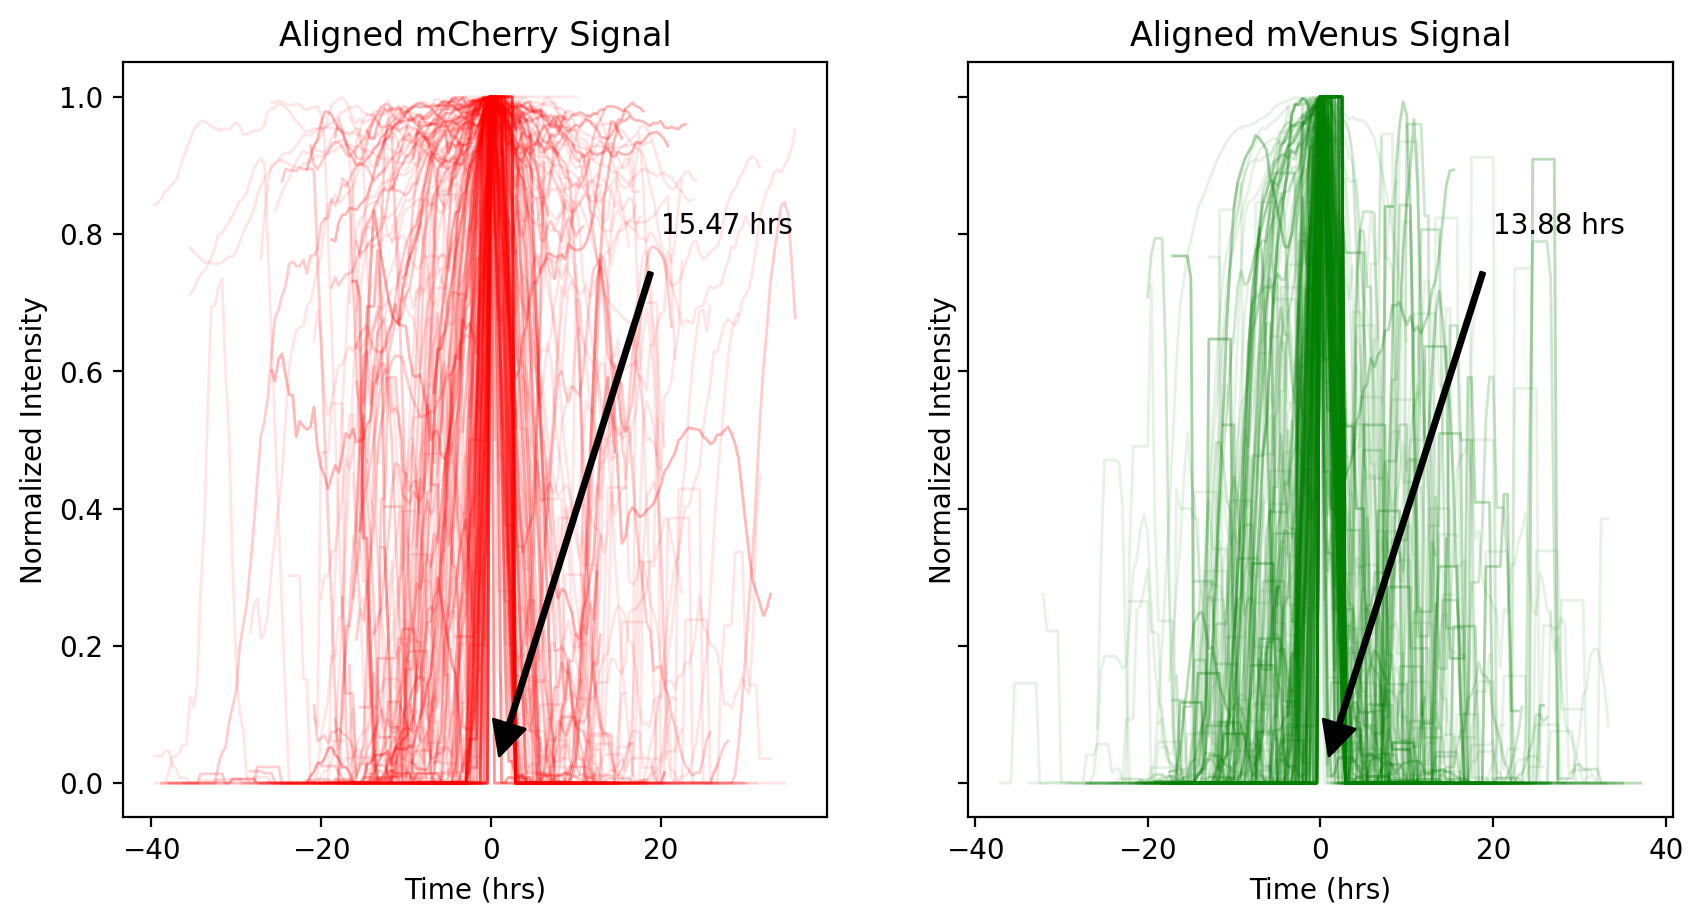

In [8]:
N = 300
alpha = 0.1

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 5
fig, axs = plt.subplots(1, 2, sharey=True)

sample = np.random.choice(df['TRACK_ID'].unique(), N)

cherry_max = []
venus_max = []
cherry_max_frame = []
venus_max_frame = []

for tid in sample:
    tmp = df[df['TRACK_ID'] == tid]
    
    tmp = tmp.sort_values(by='FRAME')
    
    # align the time to the maximum of the peak (t==0) 
    cher_t0 = tmp.loc[tmp['clean_mCherry'] == tmp['clean_mCherry'].max(), 'STEP'].iloc[0]
    ven_t0 = tmp.loc[tmp['clean_mVenus'] == tmp['clean_mVenus'].max(), 'STEP'].iloc[0]
    
    cher_t0_frame = tmp.loc[tmp['clean_mCherry'] == tmp['clean_mCherry'].max(), 'FRAME'].iloc[0]
    ven_t0_frame = tmp.loc[tmp['clean_mVenus'] == tmp['clean_mVenus'].max(), 'FRAME'].iloc[0]
    
    cherry_max.append(cher_t0)
    venus_max.append(ven_t0)
    
    cherry_max_frame.append(cher_t0_frame)
    venus_max_frame.append(ven_t0_frame)
    
    tmp['cherry_clock'] = ((tmp['STEP'] - cher_t0 ) * MINUTES_PER_FRAME) / 60
    tmp['venus_clock'] = ((tmp['STEP'] - ven_t0 ) * MINUTES_PER_FRAME) / 60

    axs[0].plot(tmp['cherry_clock'], tmp['clean_mCherry'], lw=1, alpha=alpha, c='r')
    axs[0].set_title('Aligned mCherry Signal')
    axs[0].set_ylabel('Normalized Intensity')
    axs[0].set_xlabel('Time (hrs)')
    
    axs[1].plot(tmp['venus_clock'], tmp['clean_mVenus'], lw=1, alpha=alpha, c='g')
    axs[1].set_title('Aligned mVenus Signal')
    axs[1].set_ylabel('Normalized Intensity')
    axs[1].set_xlabel('Time (hrs)')


# covert to hours
cherry_max = [(x * MINUTES_PER_FRAME) / 60 for x in cherry_max]
venus_max = [(x * MINUTES_PER_FRAME) / 60 for x in venus_max]

    
axs[0].annotate(f'{np.mean(cherry_max):.2f} hrs', 
                xy=(0, 0), 
                xytext=(20, 0.8),
                arrowprops=dict(
                    facecolor='black', 
                    shrink=0.05,
                     width=1.5),
        )


axs[1].annotate(f'{np.mean(venus_max):.2f} hrs', 
                xy=(0, 0), 
                xytext=(20, 0.8),
                arrowprops=dict(
                    facecolor='black', 
                    shrink=0.05,
                     width=1.5),
        )



np.median(cherry_max)

In [9]:
# frame-based normalization factors
grped = df.groupby(['TRACK_ID','Condition']).agg(
    mCherry_mean = ('clean_mCherry', np.mean),
    mCherry_std = ('clean_mCherry', np.std),
    mCherry_median = ('clean_mCherry', np.median),
    
    mVenus_mean = ('clean_mVenus', np.mean),
    mVenus_std = ('clean_mVenus', np.std),
    mVenus_median = ('clean_mVenus', np.median),
).reset_index()

df = pd.merge(df, grped, on=['TRACK_ID', 'Condition'], how='left')

print(df.columns)

Index(['TRACK_ID', 'QUALITY', 'SNR', 'POSITION_X', 'POSITION_Y', 'FRAME',
       'Time', 'STEP', 'NORMED_STEP', 'RADIUS', 'MEAN_INTENSITY01',
       'MEAN_INTENSITY02', 'MEAN_INTENSITY03', 'MEAN_TRACK_INTENSITY01',
       'MEAN_TRACK_INTENSITY02', 'MEAN_TRACK_INTENSITY03',
       'TOTAL_DISTANCE_TRAVELED', 'TRACK_DURATION', 'Scene', 'Condition',
       'mVenus', 'mCherry', 'H2B', 'clean_mCherry', 'clean_mVenus',
       'clean_H2B', 'ANY_mCherry', 'ANY_mVenus', 'ANY_H2B', 'has_mCherry',
       'has_mVenus', 'has_H2B', 'max_step', 'mCherry_mean', 'mCherry_std',
       'mCherry_median', 'mVenus_mean', 'mVenus_std', 'mVenus_median'],
      dtype='object')


In [10]:
def state_guesser(row):
    """An apply function to return an initial estimate of the cell state"""
    
    if row['clean_mVenus'] >= row['clean_mCherry'] :
        return "G1"
    elif row['clean_mCherry'] >= row['clean_mVenus']:
        return "S"
    else:
        return "G2/M"
    
    

df['state_guess'] = df.apply(lambda row: state_guesser(row), axis=1)
print(df['state_guess'].value_counts(dropna=False))

S       10499
G1       8354
G2/M     1944
Name: state_guess, dtype: int64


In [11]:
transitions = {
    "G1" : "S",
    "S" : "G2/M",
    "G2/M" : "G1",
}


state_dfs = []

for tid in df['TRACK_ID'].unique():
    
    tmp = df[df['TRACK_ID'] == tid].sort_values(by=['TRACK_ID', 'FRAME'])
    
    states = tmp['state_guess'].to_list()
    
    for i, s in enumerate(states):
        if i > 0:
            prev_state = states[i - 1]
            curr_state = states[i]
            
            if not curr_state == transitions[prev_state]:
                states[i] = prev_state
                
    tmp['updated_guess'] = states
    
    state_dfs.append(tmp)

states = pd.concat(state_dfs, ignore_index=True)
print(states.shape)
states.head()

(20797, 41)


,TRACK_ID,QUALITY,SNR,POSITION_X,POSITION_Y,FRAME,Time,STEP,NORMED_STEP,RADIUS,...,has_H2B,max_step,mCherry_mean,mCherry_std,mCherry_median,mVenus_mean,mVenus_std,mVenus_median,state_guess,updated_guess
0,10_B3,1.851,2.651,1036.329,164.198,0,0.000000,0,0.000000,9.0,...,1,43,0.812198,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M
1,10_B3,1.814,2.024,1037.155,167.905,1,0.416667,1,0.000015,9.0,...,1,43,0.812198,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M
2,10_B3,1.750,1.934,1031.903,177.495,2,0.833333,2,0.000030,9.0,...,1,43,0.812198,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M
3,10_B3,1.732,1.877,1031.392,179.730,3,1.250000,3,0.000044,9.0,...,1,43,0.812198,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M
4,10_B3,1.736,1.920,1028.061,181.153,4,1.666667,4,0.000059,9.0,...,1,43,0.812198,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M


In [12]:
print(states['state_guess'].value_counts(dropna=False))

S       10499
G1       8354
G2/M     1944
Name: state_guess, dtype: int64


Text(0.75, 2, 'Initial')

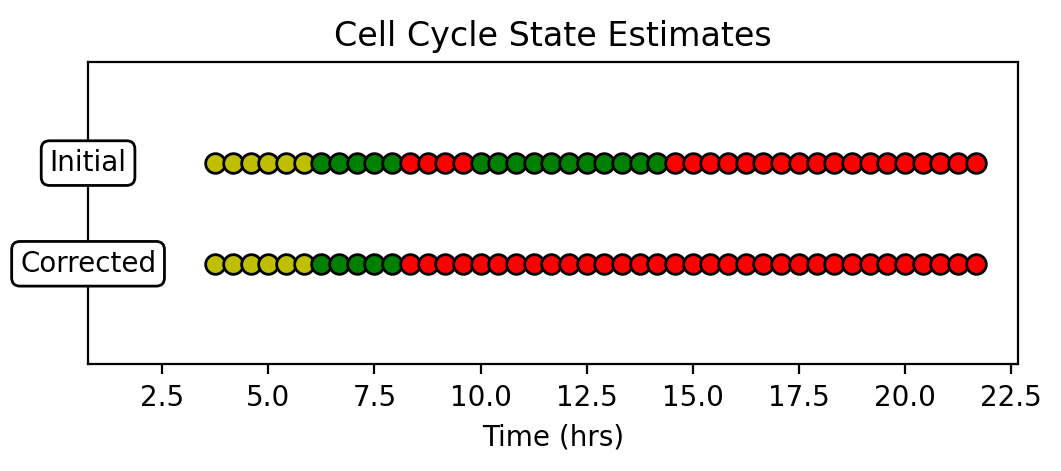

In [29]:
rid = np.random.choice(states['TRACK_ID'], 1)[0]

tmp = states[states['TRACK_ID'] == rid]
tmp = tmp.sort_values(by='FRAME').reset_index()

plt.rcParams['figure.figsize'] = 6, 2

for idx, row in tmp.iterrows():
    if row['state_guess'] == 'G1':
        plt.scatter(row['Time'], 2, s=50, c='g', edgecolor='k')
    elif row['state_guess'] == 'S':
            plt.scatter(row['Time'], 2, s=50, c='r', edgecolor='k')
    elif row['state_guess'] == 'G2/M':
        plt.scatter(row['Time'], 2, s=50, c='y', edgecolor='k')
        
        
    if row['updated_guess'] == 'G1':
        plt.scatter(row['Time'], 1, s=50, c='g', edgecolor='k')
    elif row['updated_guess'] == 'S':
        plt.scatter(row['Time'], 1, s=50, c='r', edgecolor='k')
    elif row['updated_guess'] == 'G2/M':
        plt.scatter(row['Time'], 1, s=50, c='y', edgecolor='k')
    
    
ax = plt.gca()
ax.set_ylim([0,3])
ax.axes.get_yaxis().set_visible(False)
plt.title(f"Cell Cycle State Estimates")
plt.xlabel("Time (hrs)")

min_t = tmp['Time'].min() - 3
max_t = tmp['Time'].max() + 1

ax.set_xlim([min_t,max_t])

ax.annotate("Corrected", xy=(min_t, 1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

ax.annotate("Initial", xy=(min_t, 2), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

In [14]:
print(len(states))

y = pd.get_dummies(states['updated_guess'])
states = states.join(y)

print(len(states))
states.head()

20797
20797


,TRACK_ID,QUALITY,SNR,POSITION_X,POSITION_Y,FRAME,Time,STEP,NORMED_STEP,RADIUS,...,mCherry_std,mCherry_median,mVenus_mean,mVenus_std,mVenus_median,state_guess,updated_guess,G1,G2/M,S
0,10_B3,1.851,2.651,1036.329,164.198,0,0.000000,0,0.000000,9.0,...,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M,0,1,0
1,10_B3,1.814,2.024,1037.155,167.905,1,0.416667,1,0.000015,9.0,...,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M,0,1,0
2,10_B3,1.750,1.934,1031.903,177.495,2,0.833333,2,0.000030,9.0,...,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M,0,1,0
3,10_B3,1.732,1.877,1031.392,179.730,3,1.250000,3,0.000044,9.0,...,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M,0,1,0
4,10_B3,1.736,1.920,1028.061,181.153,4,1.666667,4,0.000059,9.0,...,0.203884,0.912786,0.414566,0.328915,0.457142,G2/M,G2/M,0,1,0


In [15]:
grped = states.groupby(['Time', 'Condition']).agg(
    sum_G1 = ('G1', np.sum),
    sum_S = ('S', np.sum),
    sum_G2 = ('G2/M', np.sum),
).reset_index()


grped.head()

,Time,Condition,sum_G1,sum_S,sum_G2
0,0.000000,Control,0,0,33
1,0.000000,MyoD,0,0,61
2,0.000000,PRRX1,0,0,13
3,0.000000,Twist2,0,0,23
4,0.416667,Control,0,0,33


In [16]:
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 5, 6

# colors = {
#     "PRRX1" : "r",
#     "Control" : "b",
#     "MyoD" : "k",
#     "Twist2" : "g"
# }

# fig, axs = plt.subplots(3, sharex=True)

# for cond in grped['Condition'].unique():
#     tmp = grped[grped['Condition'] == cond].reset_index()
    
#     tmp['normed_G1'] = tmp['sum_G1'] / tmp['sum_G1'].max()
#     tmp['normed_S'] = tmp['sum_S'] / tmp['sum_S'].max()
#     tmp['normed_G2'] = tmp['sum_G2'] / tmp['sum_G2'].max()
    
#     axs[0].plot(tmp['Time'], 
#              tmp['normed_G1'], 
#              label=cond, 
#              c=colors[cond], 
#              lw=1)
    
#     axs[0].set_title("Estimated Cells in G1")
#     axs[0].set_ylabel("Normalized Cell Count")
#     axs[0].legend(title='Condition', bbox_to_anchor=(1.32, 0.5), loc=7)
    
#     axs[1].plot(tmp['Time'], 
#          tmp['normed_S'], 
#          label=cond, 
#          c=colors[cond], 
#          lw=1)
    
#     axs[1].set_title("Estimated Cells in S")
#     axs[1].set_ylabel("Normalized Cell Count")
#     axs[1].legend(title='Condition', bbox_to_anchor=(1.32, 0.5), loc=7)
    
    
#     axs[2].plot(tmp['Time'], 
#          tmp['normed_G2'], 
#          label=cond, 
#          c=colors[cond], 
#          lw=1)

#     axs[2].set_title("Estimated Cells in G2/M")
#     axs[2].set_ylabel("Normalized Cell Count")
#     axs[2].legend(title='Condition', bbox_to_anchor=(1.32, 0.5), loc=7)

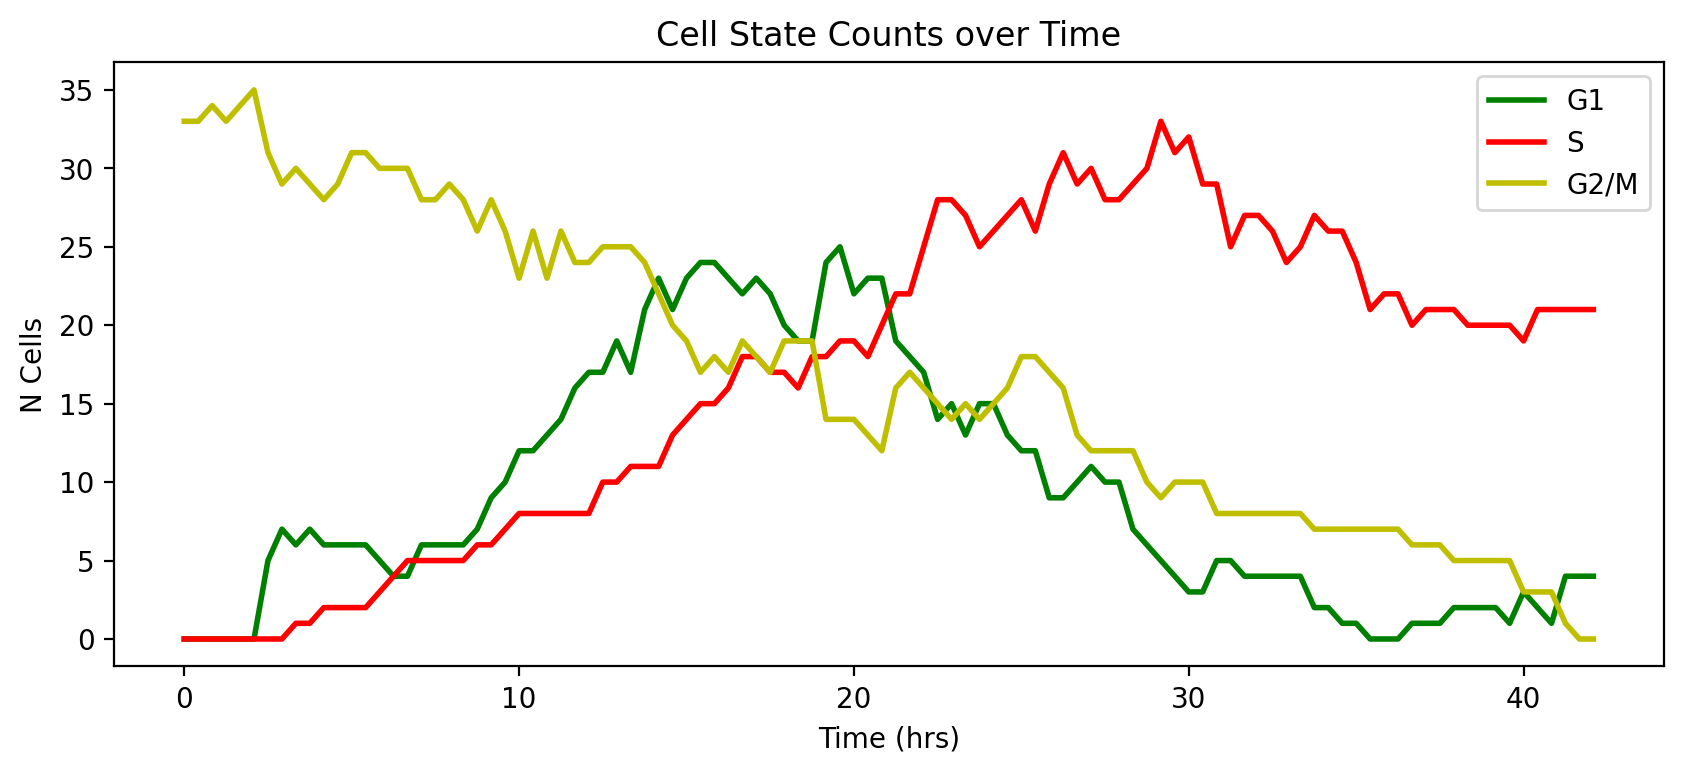

In [17]:
control = grped[grped['Condition'] == 'Control']

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 4

"""
CONTROL
"""

plt.plot(control['Time'], 
               control['sum_G1'], 
               label='G1', 
               c='g', 
               lw=2)


plt.plot(control['Time'], 
               control['sum_S'], 
               label='S', 
               c='r', 
               lw=2)


plt.plot(control['Time'], 
               control['sum_G2'], 
               label='G2/M', 
               c='y', 
               lw=2)

plt.title("Cell State Counts over Time")
plt.ylabel("N Cells")
plt.xlabel("Time (hrs)")
plt.legend()

(813.0396, 855.2664, 263.36645, 334.17454999999995)

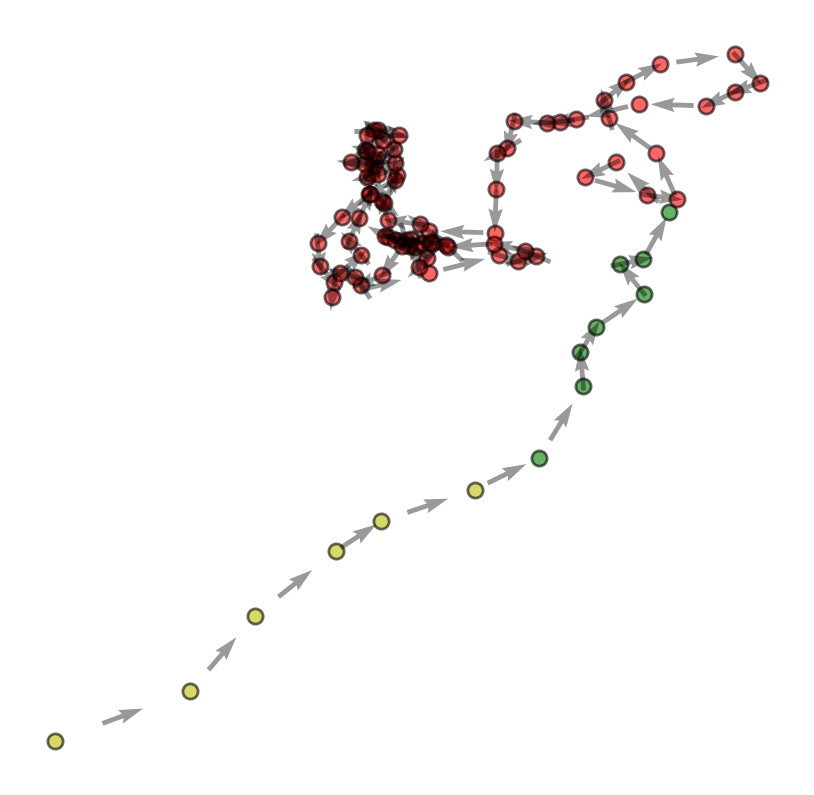

In [18]:
rid = np.random.choice(states['TRACK_ID'], 1)[0]

tmp = states[states['TRACK_ID'] == rid]

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5,5

alpha = 0.6
arrow_alpha=0.4
size = 30


for phase in tmp['updated_guess'].unique():
    st_tmp = tmp[tmp['updated_guess'] == phase]

    if phase == 'G1':
        plt.scatter(st_tmp['POSITION_X'], st_tmp['POSITION_Y'], s=size, c='g', edgecolor='k', alpha=alpha)

    if phase == 'S':
        plt.scatter(st_tmp['POSITION_X'], st_tmp['POSITION_Y'], s=size, c='r', edgecolor='k', alpha=alpha)

    if phase == 'G2/M':
        plt.scatter(st_tmp['POSITION_X'], st_tmp['POSITION_Y'], s=size, c='y', edgecolor='k', alpha=alpha)
        
x = tmp['POSITION_X'].values
y = tmp['POSITION_Y'].values

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2)   

plt.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", alpha=arrow_alpha)
# plt.title("Spatial Cell Cycle Estimates in Time") 
plt.axis(False)

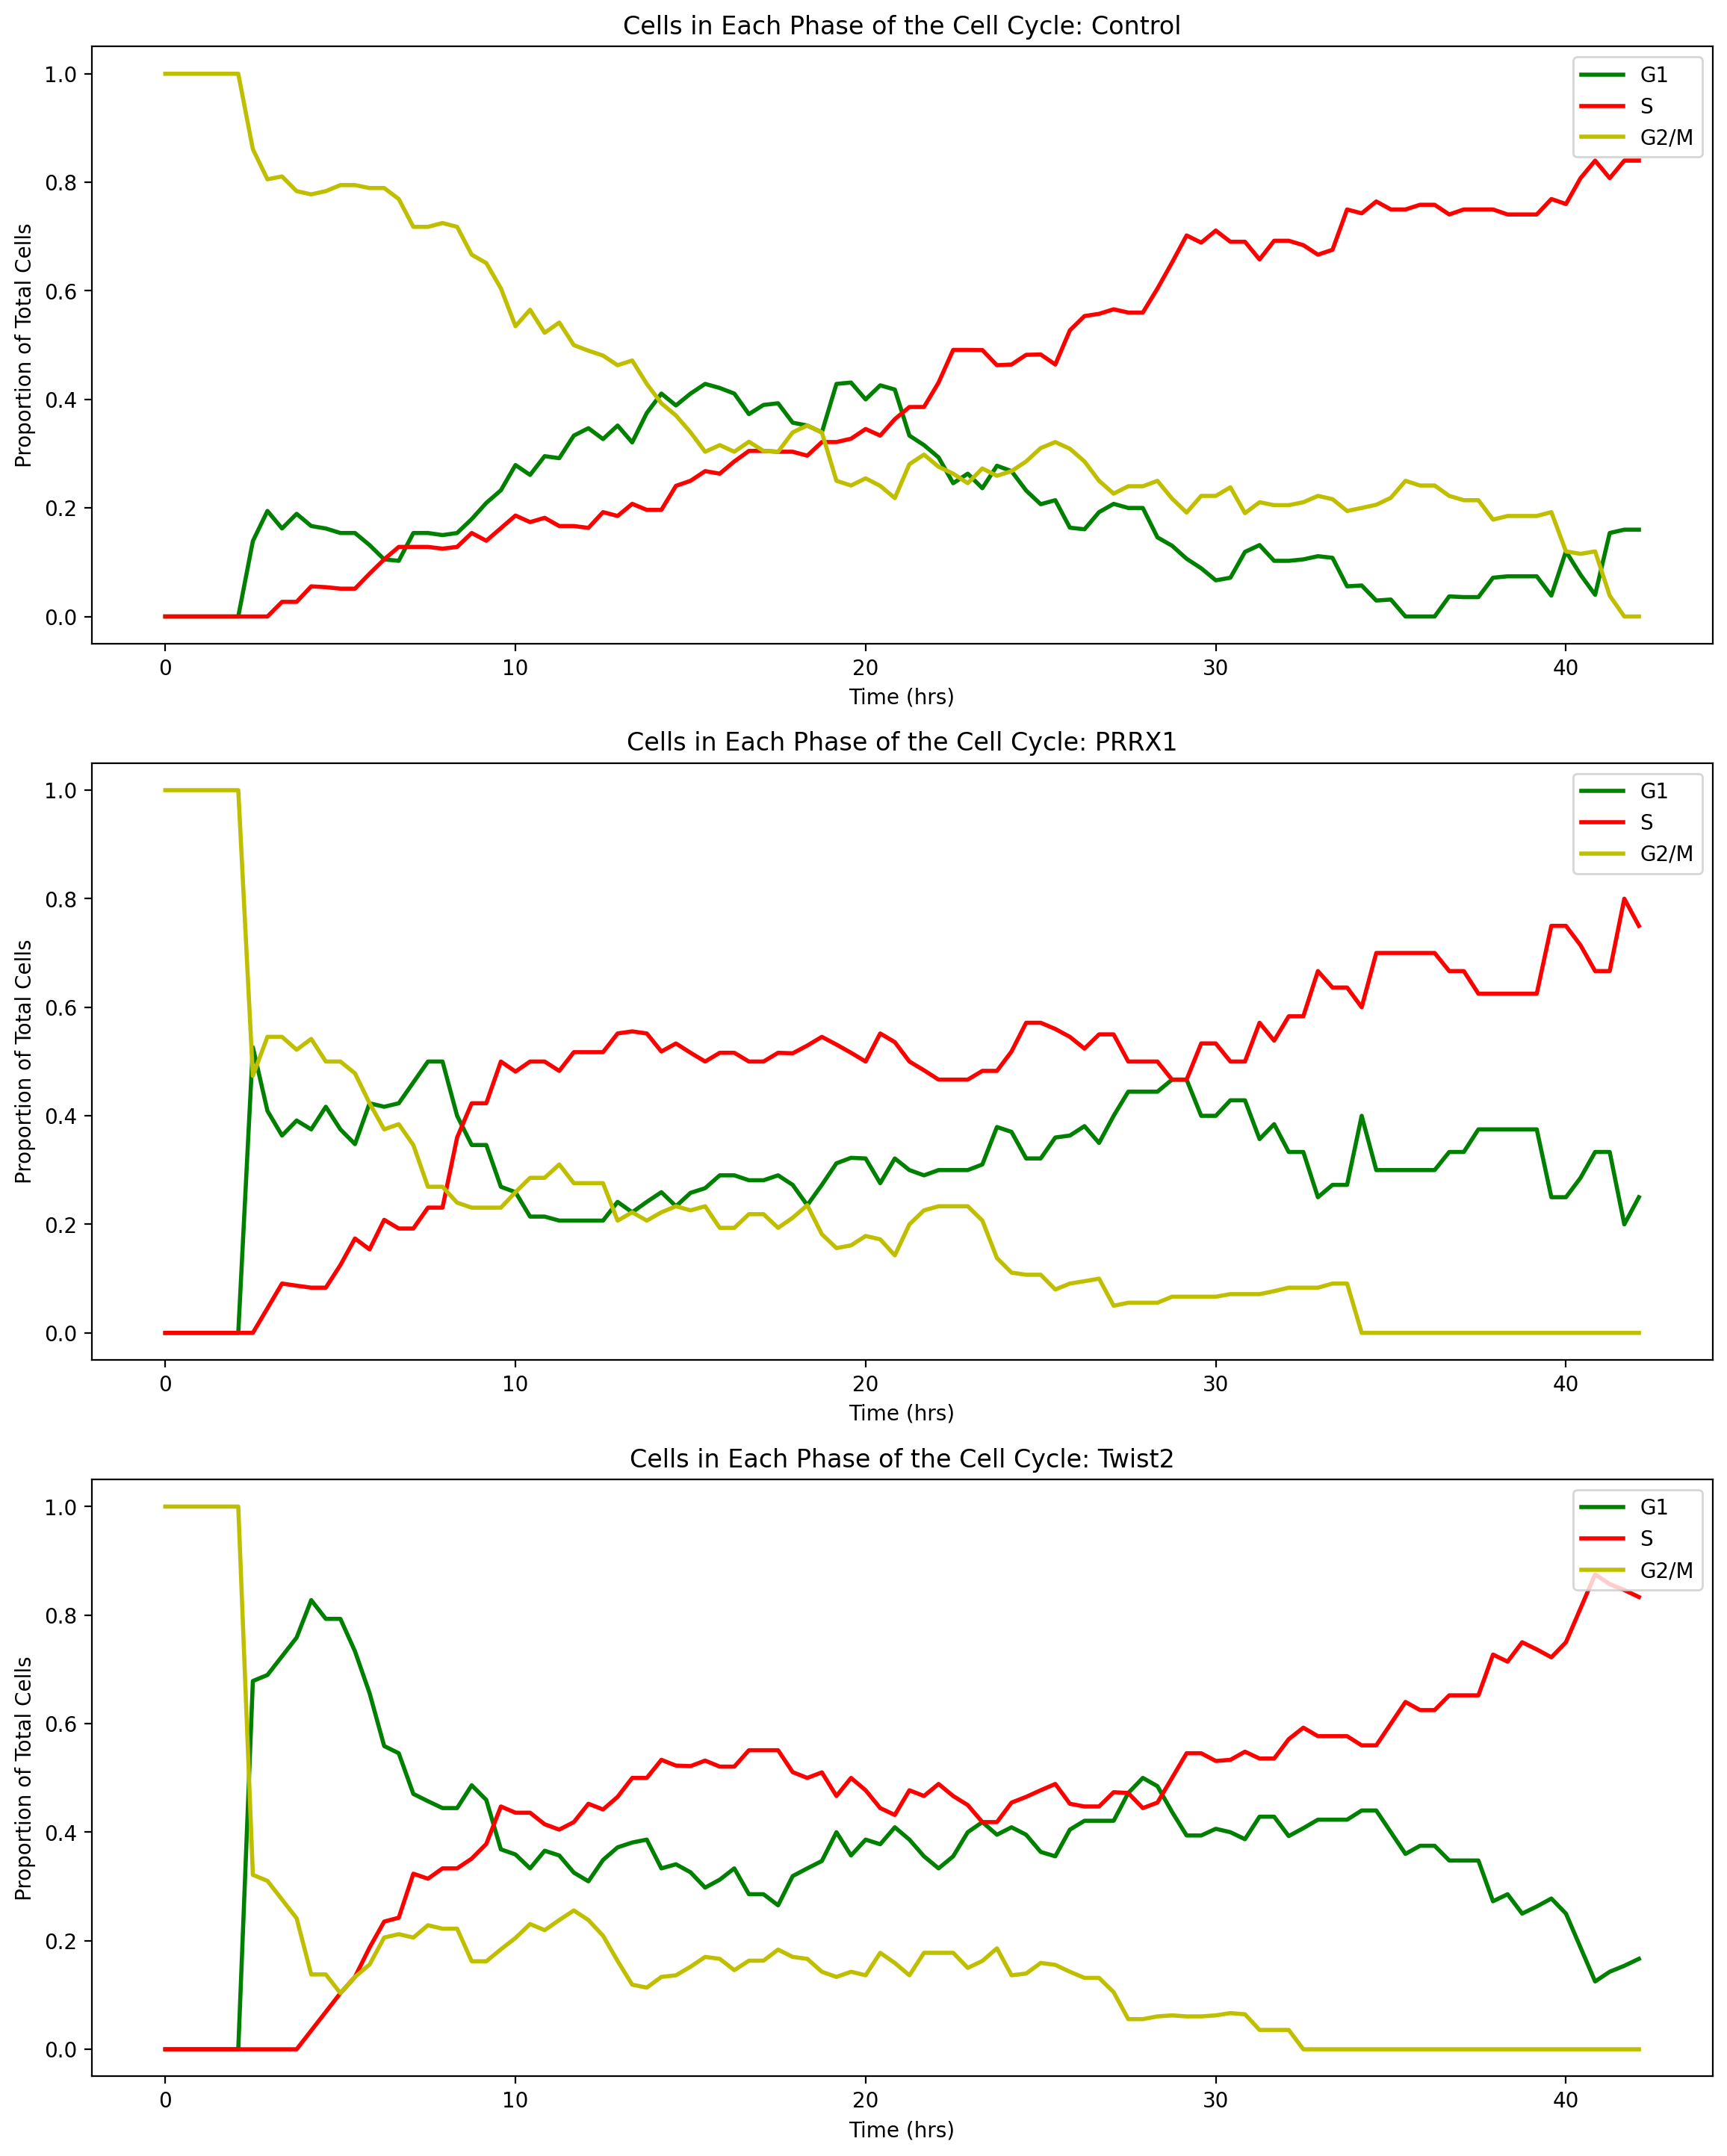

In [19]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 14, 18

fig, axs = plt.subplots(3, 1)

conds = ['Control', 'PRRX1', 'Twist2']


for i, cond in enumerate(conds):
    cond_frame = grped[grped['Condition'] == cond].reset_index()
    
    cond_frame['total'] = cond_frame['sum_G1'] + cond_frame['sum_S'] + cond_frame['sum_G2']
    
    cond_frame['sum_G1_prop'] = cond_frame['sum_G1'] / cond_frame['total']
    cond_frame['sum_S_prop'] = cond_frame['sum_S'] / cond_frame['total']
    cond_frame['sum_G2_prop'] = cond_frame['sum_G2'] / cond_frame['total']
    

    axs[i].plot(cond_frame['Time'], cond_frame['sum_G1_prop'], c='g', lw=2, label='G1')
    axs[i].plot(cond_frame['Time'], cond_frame['sum_S_prop'], c='r', lw=2, label='S')
    axs[i].plot(cond_frame['Time'], cond_frame['sum_G2_prop'], c='y', lw=2, label='G2/M')
    
    axs[i].set_title(f"Cells in Each Phase of the Cell Cycle: {cond}")
    axs[i].set_ylabel("Proportion of Total Cells")
    axs[i].set_xlabel("Time (hrs)")
    axs[i].legend(loc="upper right")
    


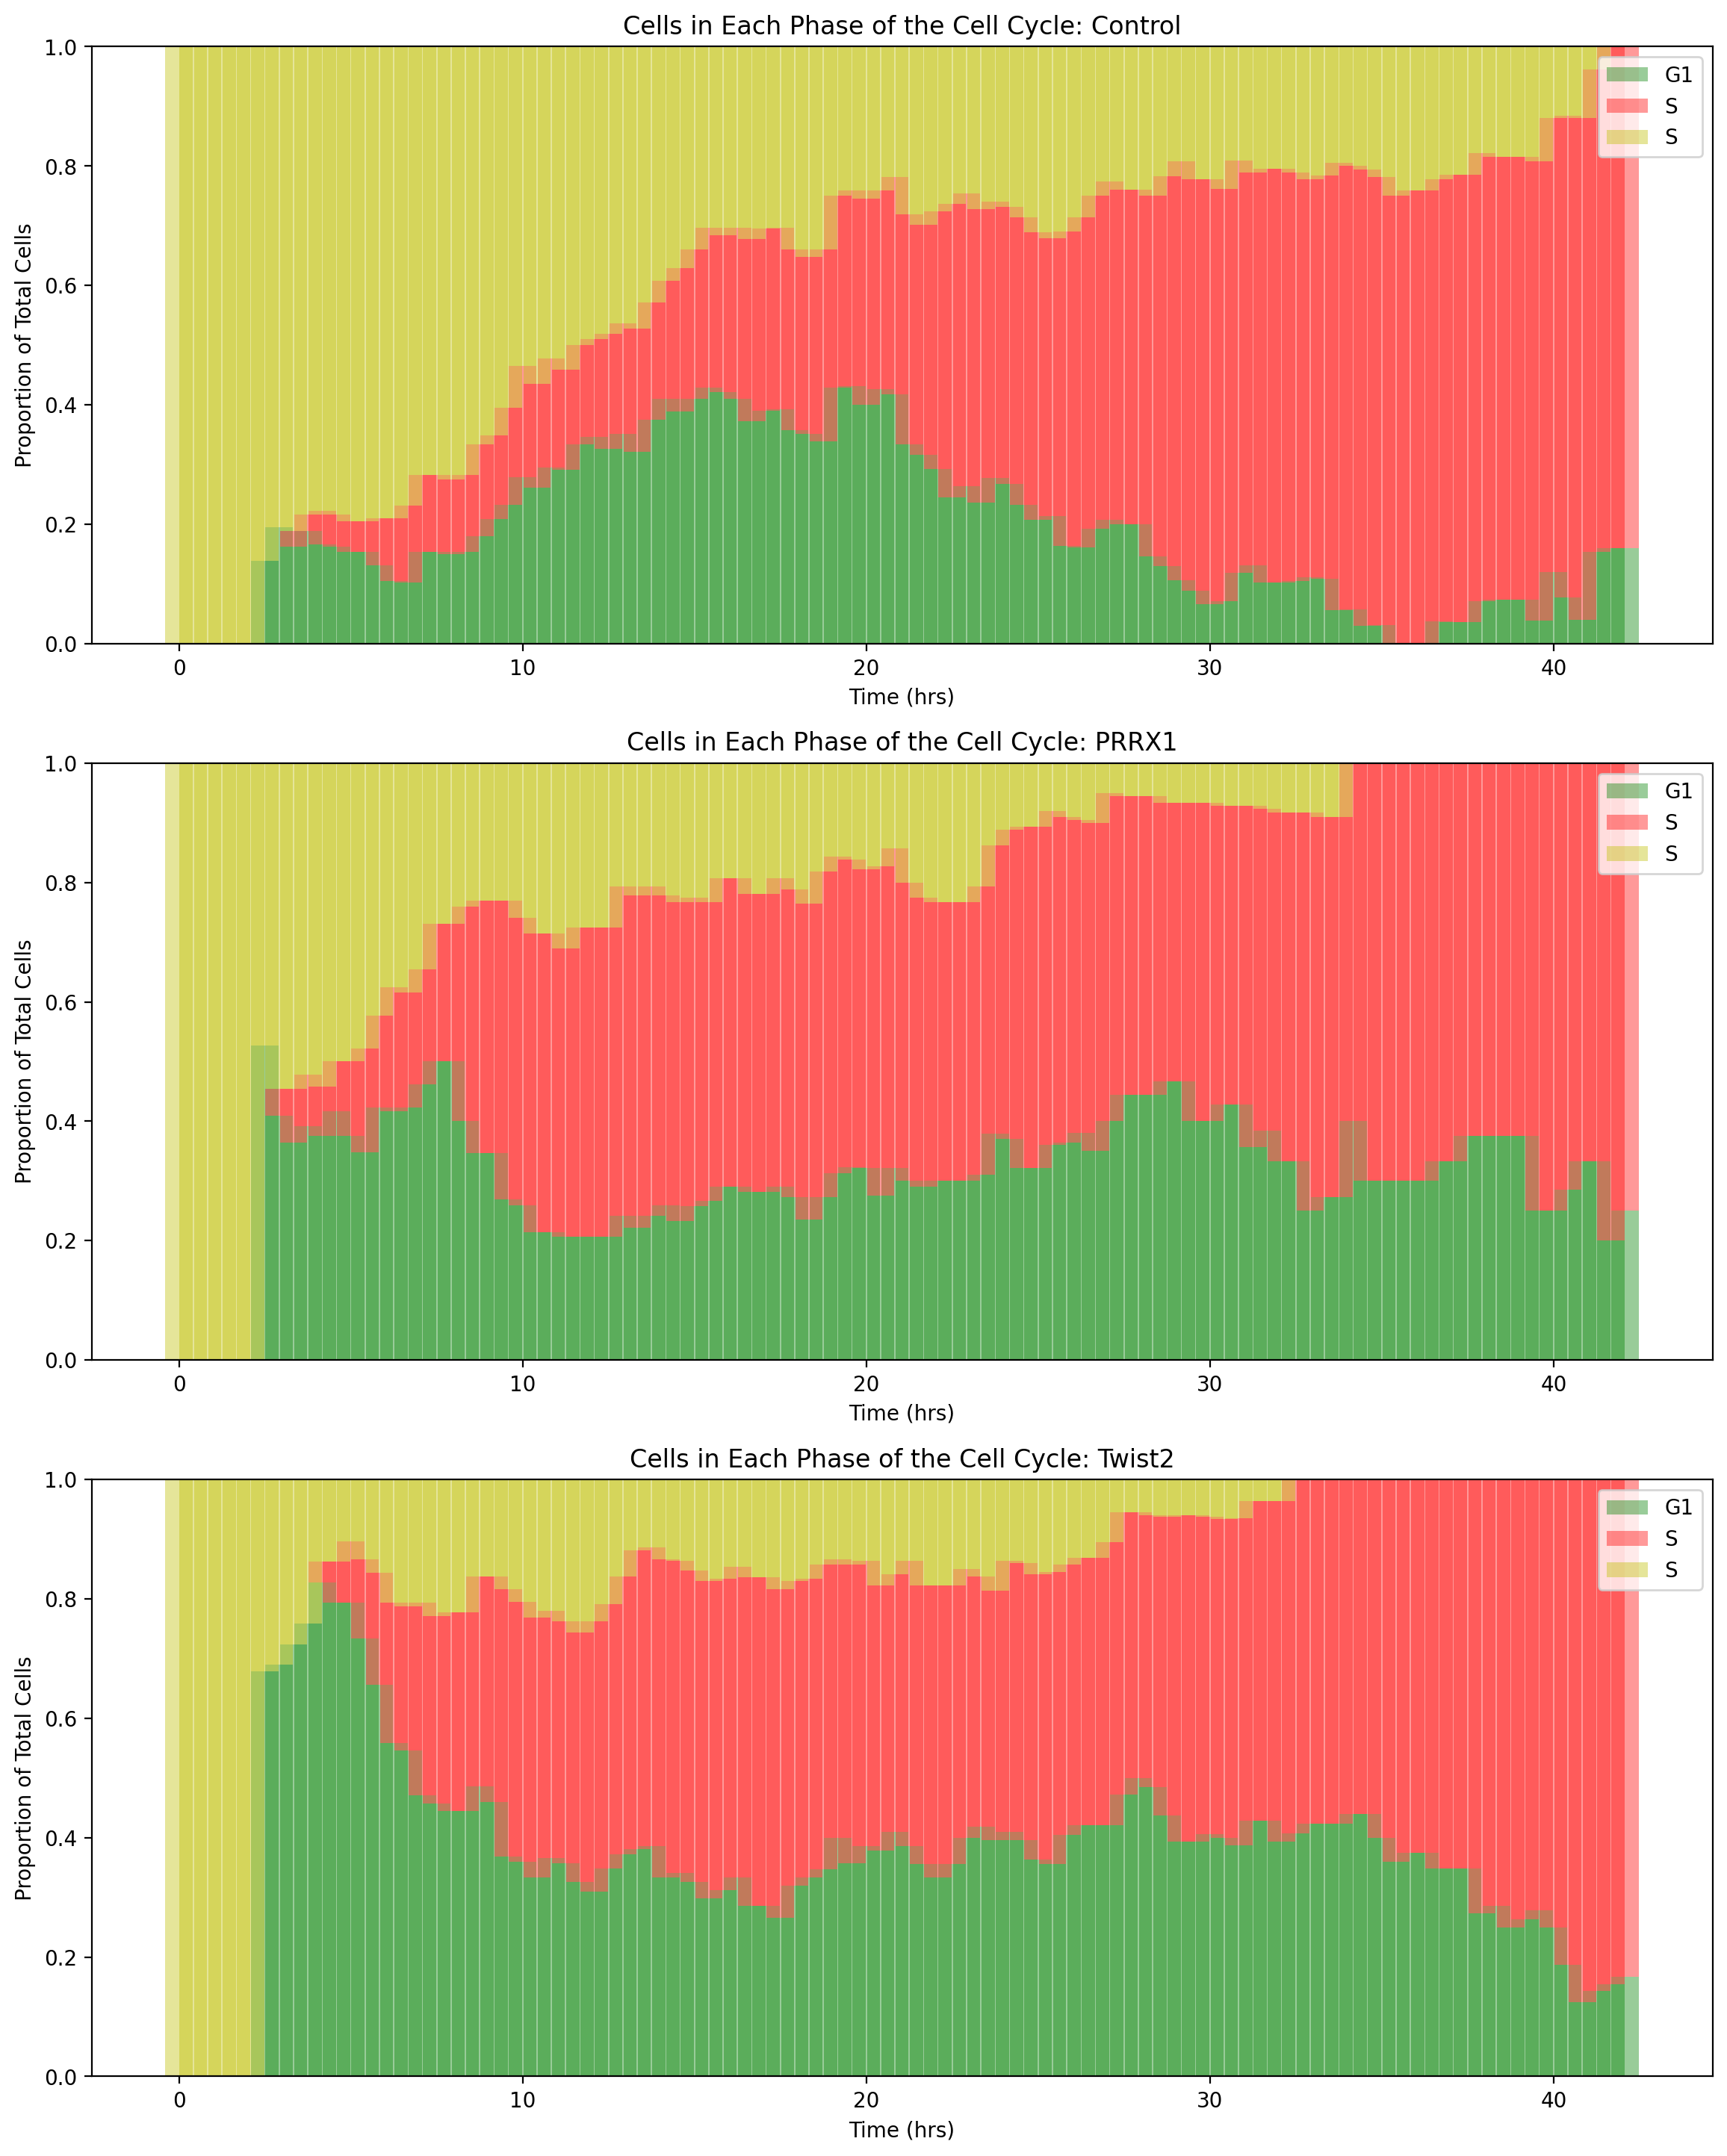

In [20]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 14, 18

alpha = 0.4

fig, axs = plt.subplots(3, 1)

conds = ['Control', 'PRRX1', 'Twist2']


for i, cond in enumerate(conds):
    cond_frame = grped[grped['Condition'] == cond].reset_index()
    
    cond_frame['total'] = cond_frame['sum_G1'] + cond_frame['sum_S'] + cond_frame['sum_G2']
    
    cond_frame['sum_G1_prop'] = cond_frame['sum_G1'] / cond_frame['total']
    cond_frame['sum_S_prop'] = cond_frame['sum_S'] / cond_frame['total']
    cond_frame['sum_G2_prop'] = cond_frame['sum_G2'] / cond_frame['total']
    
    axs[i].bar(cond_frame['Time'], cond_frame['sum_G1_prop'], color='g', label='G1', alpha=alpha)
    axs[i].bar(cond_frame['Time'], cond_frame['sum_S_prop'],  color='r', bottom=cond_frame['sum_G1_prop'], label='S', alpha=alpha)
    axs[i].bar(cond_frame['Time'], cond_frame['sum_G2_prop'],  color='y', bottom=cond_frame['sum_G1_prop'] + cond_frame['sum_S_prop'], label='S', alpha=alpha)
    
    axs[i].set_title(f"Cells in Each Phase of the Cell Cycle: {cond}")
    axs[i].set_ylabel("Proportion of Total Cells")
    axs[i].set_xlabel("Time (hrs)")
    axs[i].legend(loc="upper right")
    
    

In [21]:
# for tid in df['TRACK_ID'].unique():
#     tmp = df[df['TRACK_ID'] == tid]
    
    
    
#     plt.plot(tmp['Time'], 
#              tmp['mVenus'],
#              alpha=0.2,
#              c='g',
#              lw=1)